In [35]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import string

In [5]:
!ls ../data

dearabby_qa.csv        dearabby_scraper.ipynb scraper.py


In [9]:
df = pd.read_csv('../data/dearabby_qa.csv', index_col=0)

In [12]:
X = df['qa']

In [36]:
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        stemmer = SnowballStemmer('english')
        analyzer = super().build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc) if w.isalpha() and len(w) > 3])

stv = StemmedTfidfVectorizer(strip_accents='unicode',
                            stop_words=set(stopwords.words('english')) | set(string.punctuation) | {'abby', 'year', 'time'},
                             min_df=2,
                             max_df=0.5,
                             ngram_range=(1, 3),
                             max_features=10000)



In [95]:
X = df.loc[df['categories'].notna(), 'qa']

In [37]:
with open('tfidf_vect.model', 'rb') as f:
    tfidf_vect = pickle.load(f)

In [43]:
with open('pca.model', 'rb') as f:
    pca = pickle.load(f)

In [44]:
with open('kmeans.model', 'rb') as f:
    km = pickle.load(f)

In [96]:
tfidf_X = tfidf_vect.transform(X)

In [97]:
pca_X = pca.transform(tfidf_X.toarray())

In [98]:
labels = km.predict(pca_X)

In [50]:
labels

array([1, 0, 0, ..., 1, 2, 2], dtype=int32)

In [53]:
with open('predictions', 'rb') as f:
    preds = pickle.load(f)

In [64]:
km.transform(pca_X)

array([[0.15000182, 0.01076585, 0.12808418],
       [0.01974334, 0.17671886, 0.14316272],
       [0.03066716, 0.17314462, 0.12244604],
       ...,
       [0.19965921, 0.09318186, 0.1045842 ],
       [0.14870054, 0.14061609, 0.014375  ],
       [0.16418231, 0.22219422, 0.0855553 ]])

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

In [107]:
with open('x.csv', 'rb') as f:
     file = pickle.load(f)

array([[-0.08584313, -0.0176334 ],
       [ 0.10508566, -0.03577393],
       [ 0.08168902, -0.02379385],
       ...,
       [-0.12365739,  0.02049542],
       [-0.06594185, -0.05684082],
       [-0.02603782, -0.13698002]])

In [102]:
with open('x.csv', 'wb') as f:
    pickle.dump(pca_X, f)

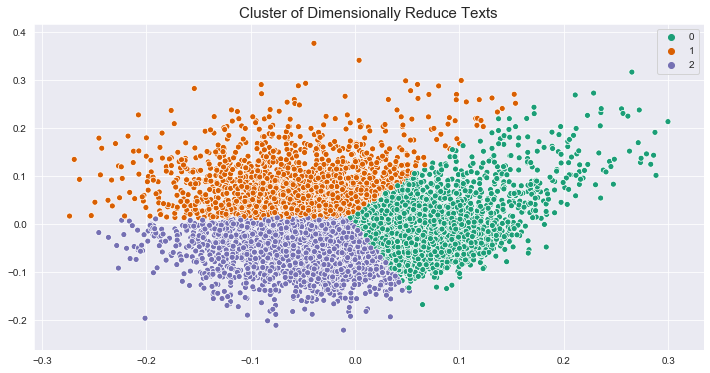

In [99]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(pca_X[:, 0], pca_X[:, 1], hue=labels, palette='Dark2')
ax.set_title('Cluster of Dimensionally Reduce Texts', fontsize=15);